### 1. <i>Import Packages</i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
import pyodbc

### 2. Guidlines to Dealing and Connect to SQL Server DB

<P>Using <b>Pyodbc</b> to connect to a <b>Microsoft sql server</b> database</P>

1- To install it <code>pip install pyodbc</code> <b>OR</b> <code>conda install pyodbc</code>

2- To Read <b>Documentation</b> visit: https://github.com/mkleehammer/pyodbc/wiki

In [3]:
import pyodbc

Find the <b>DRIVERS</b> available

In [4]:
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server',
 'ODBC Driver 18 for SQL Server']

Create a VARIABLE to store the <b>connection string</b>

In [5]:
conn = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-2BVV9CV;DATABASE=ContosoRetailDW;Trusted_Connection=yes;'

Write random <b>Query</b> to select first 10 row from DimProduct table

In [6]:
query = 'select top(10) * from DimProduct'

<b>Create</b> a CONNECTION and <b>import</b> the DATA

In [7]:
## connect and execute and fetch_data
with pyodbc.connect(conn) as conx:  ##open connection and it will close automaticly after exiting with
    cursor = conx.cursor()          ## create a cursor we will use to communicate with database
    cursor.execute(query)           ## Run the query we had written before
    data = cursor.fetchall()        ## Extract all the data

<b>Display</b> first row of data

In [8]:
print(data[:1])

[(1, '0101001', 'Contoso 512MB MP3 Player E51 Silver', '512MB USB driver plays MP3 and WMA', 1, 'Contoso, Ltd', 'Contoso', '1', 'Economy', '1', 'Product0101001', '7', 'Silver', '2.2 x 1.8 x 4 ', ' ', ' ', 4.8, 'ounces', '1', 'inches', '1', 'High', Decimal('6.6200'), Decimal('12.9900'), datetime.datetime(2005, 5, 3, 0, 0), None, 'On', None, None, 1, datetime.datetime(2008, 5, 25, 8, 1, 12), datetime.datetime(2008, 5, 25, 8, 1, 12))]


Extract <b>Column Names</b>

In [9]:
product_columns = [row.column_name for row in cursor.columns(table='DimProduct')]

Convert Query results to <b>DataFrame</b>

<b>WITH PANDAS EVERYTHING IS EASY<b>

EXTRACT data using <b>read_sql</b> in format <b>DataFrame</b>

In [10]:
with pyodbc.connect(conn) as conx:  ##open connection and it will close automaticly after exiting with
    result = pd.read_sql('select BrandName from DimProduct',conx)

result[:1]

,BrandName
0,Contoso


Declare Function for usability purpose

In [11]:
def run_query(query):
    with pyodbc.connect(conn) as conx: 
        result = pd.read_sql(query,conx)
    return result
        

<b>Final Statement To extract Data from the DB in the Future</b>

<code>data = run_query('Write the Query Here....')</code>

### 3. Customer Analysis and Classification

#### 1.<b>import</b> data.

In [12]:
customer_view = run_query('select * from V_Customer ')

In [13]:
customer_view.head()

,CustomerKey,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,HouseOwnerFlag,NumberCarsOwned,Consumption
0,4782,65,M,M,80000.0,2,1,Bachelors,1,1,33846.3980
1,4789,56,S,F,100000.0,0,0,Bachelors,0,1,30446.6115
2,4791,62,S,M,60000.0,1,0,Partial College,1,1,35813.1730
3,4798,57,M,M,80000.0,5,5,Bachelors,1,4,30602.8955
4,4800,63,M,F,90000.0,1,0,Bachelors,1,1,31479.5825


#### 2. Exploratory Data Analysis <b>EDA</b>

In [14]:
customer_view.shape

(18484, 11)

<p><b> The Data Contains 18484 Rows and 11 Columns</b></p>

In [15]:
customer_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerKey           18484 non-null  int64  
 1   Age                   18484 non-null  int64  
 2   MaritalStatus         18484 non-null  object 
 3   Gender                18484 non-null  object 
 4   YearlyIncome          18484 non-null  float64
 5   TotalChildren         18484 non-null  int64  
 6   NumberChildrenAtHome  18484 non-null  int64  
 7   Education             18484 non-null  object 
 8   HouseOwnerFlag        18484 non-null  object 
 9   NumberCarsOwned       18484 non-null  int64  
 10  Consumption           18484 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.6+ MB


<p><b>Data types are good and contains of categorical and Numerical Data</b></p>

In [16]:
customer_view['HouseOwnerFlag'].unique()

array(['1', '0'], dtype=object)

In [17]:
customer_view['Education'].unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [18]:
customer_view.nunique()

CustomerKey             18484
Age                        70
MaritalStatus               2
Gender                      2
YearlyIncome               16
TotalChildren               6
NumberChildrenAtHome        6
Education                   5
HouseOwnerFlag              2
NumberCarsOwned             5
Consumption             18477
dtype: int64

<p><b> There are unique values in many feature the will be very good at EDA  </b></p>

In [19]:
customer_view['YearlyIncome'].unique()

array([ 80000., 100000.,  60000.,  90000.,  70000.,  30000.,  40000.,
       110000., 120000.,  50000., 150000., 160000., 130000.,  10000.,
        20000., 170000.])

In [20]:
customer_view.describe()

,CustomerKey,Age,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Consumption
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,9242.500000,60.420039,57305.777970,1.844352,1.004058,1.502705,37099.852957
std,5336.015523,11.249188,32285.841703,1.612408,1.522660,1.138394,12827.674330
min,1.000000,42.000000,10000.000000,0.000000,0.000000,0.000000,14082.861900
25%,4621.750000,52.000000,30000.000000,0.000000,0.000000,1.000000,29513.601875
50%,9242.500000,59.000000,60000.000000,2.000000,0.000000,2.000000,33292.109750
75%,13863.250000,68.000000,70000.000000,3.000000,2.000000,2.000000,38475.990375
max,18484.000000,112.000000,170000.000000,5.000000,5.000000,4.000000,85363.952500


<p><b>
<ul>
<li>The Age is between 42 years old and 112 years old</li>
<li>The avrage age is 60 years old</li>
<li>The yearlyincome is between 10000 and 170000</li>
<li>The Consumption is between 14082 and 85363</li>
<li>The Average consumption is 73099</li>
</ul>
</b></p>

In [21]:
customer_view.isna().sum()

CustomerKey             0
Age                     0
MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
Education               0
HouseOwnerFlag          0
NumberCarsOwned         0
Consumption             0
dtype: int64

In [22]:
customer_view.duplicated().sum()

0

<p><b>There are no missing data or duplicates </b></p>

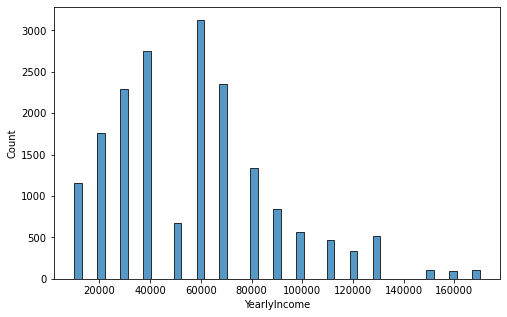

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(customer_view.YearlyIncome)
plt.show()

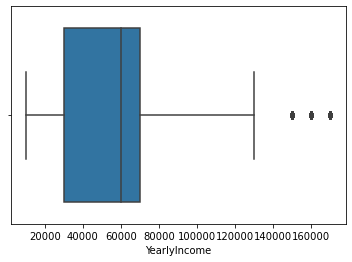

In [24]:
sns.boxplot(data=customer_view, x='YearlyIncome')
plt.show()

<p><b>The YearlyIncome data are skewed to the right and there are Outliers From Range 140000 to 170000 </b></p>

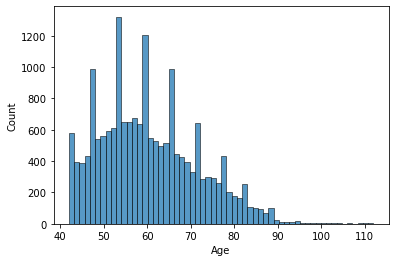

In [25]:
sns.histplot(customer_view.Age)
plt.show()

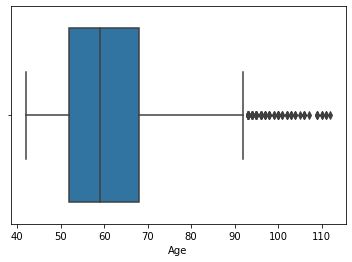

In [26]:
sns.boxplot(x='Age', data=customer_view)
plt.show()

<p><b>The Age data are skewed to the right and there are Outliers From Age 92 to 122 </b></p>

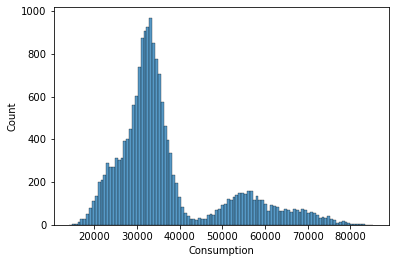

In [27]:
sns.histplot(customer_view.Consumption)
plt.show()

<b>The Majority of consumption is between 250000 and 40000 <b>

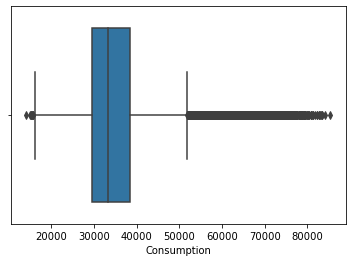

In [28]:
sns.boxplot(x='Consumption', data=customer_view)
plt.show()

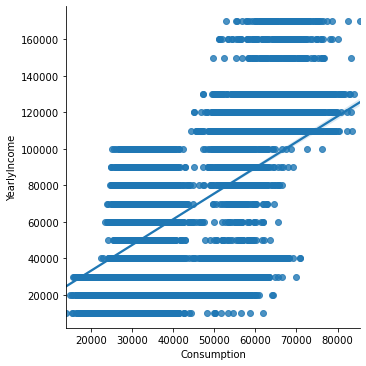

In [29]:
sns.lmplot(x='Consumption', y='YearlyIncome', data=customer_view)
plt.show()

<AxesSubplot:>

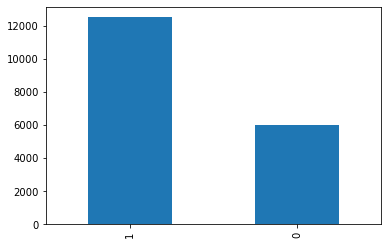

In [30]:
customer_view.HouseOwnerFlag.value_counts().plot.bar()

<AxesSubplot:>

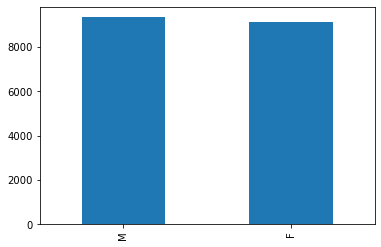

In [31]:
customer_view.Gender.value_counts().plot.bar()

<AxesSubplot:>

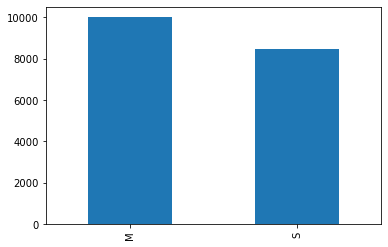

In [32]:
customer_view.MaritalStatus.value_counts().plot.bar()

In [69]:
# sales_amount_key = run_query('select sum(Amount) as Amount, CustomerKey from V_CustomerOrders group by CustomerKey')


In [70]:
# sales_amount_key.head()

,Amount,CustomerKey
0,71225.3810,7826
1,31141.4940,3581
2,55456.2466,16316
3,29861.7025,12071
4,27949.6915,17003


In [71]:
# customer_view = pd.merge(customer_view, sales_amount_key, how='inner', on='CustomerKey')

In [72]:
# customer_view.head()

,CustomerKey,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,HouseOwnerFlag,NumberCarsOwned,Consumption,Amount
0,4782,65,M,M,80000.0,2,1,Bachelors,1,1,33846.3980,33846.3980
1,4789,56,S,F,100000.0,0,0,Bachelors,0,1,30446.6115,30446.6115
2,4791,62,S,M,60000.0,1,0,Partial College,1,1,35813.1730,35813.1730
3,4798,57,M,M,80000.0,5,5,Bachelors,1,4,30602.8955,30602.8955
4,4800,63,M,F,90000.0,1,0,Bachelors,1,1,31479.5825,31479.5825


In [37]:
# customer_view.shape

In [38]:
# customer_view.CustomerKey.nunique()

In [39]:
customer_view.head()

,CustomerKey,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,HouseOwnerFlag,NumberCarsOwned,Consumption
0,4782,65,M,M,80000.0,2,1,Bachelors,1,1,33846.3980
1,4789,56,S,F,100000.0,0,0,Bachelors,0,1,30446.6115
2,4791,62,S,M,60000.0,1,0,Partial College,1,1,35813.1730
3,4798,57,M,M,80000.0,5,5,Bachelors,1,4,30602.8955
4,4800,63,M,F,90000.0,1,0,Bachelors,1,1,31479.5825


### A. Answer Questions

In [40]:
customer_data = customer_view.copy()

#### Q1: Segmantation Analysis based on Consumption Factor

In [41]:
customer_data.groupby(['Gender'])['Consumption'].sum()

Gender
F    3.388994e+08
M    3.468543e+08
Name: Consumption, dtype: float64

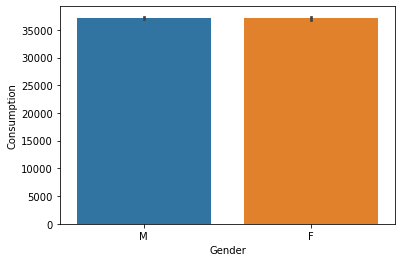

In [42]:
sns.barplot(x='Gender', y='Consumption', data=customer_data)
plt.show()

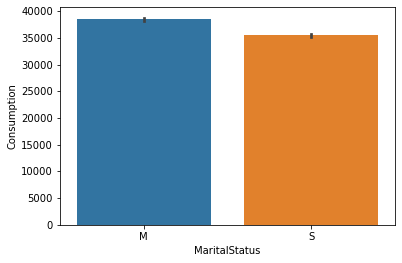

In [43]:
sns.barplot(x='MaritalStatus', y='Consumption', data=customer_data)
plt.show()

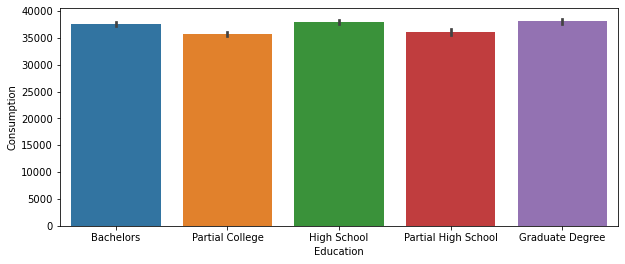

In [44]:
plt.figure(figsize=[10,4])
sns.barplot(x='Education', y='Consumption', data=customer_data)
plt.show()

In [45]:
# Convert Age to Groups data[(data['year'] >= 2005) & (data['year'] <= 2010)]

In [46]:
np.max(customer_data['Age'])

112

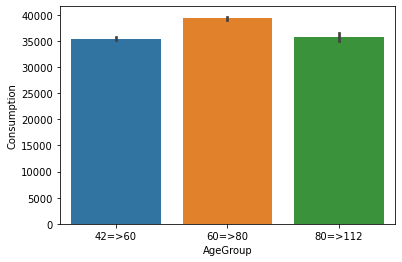

In [47]:
bins = [np.min(customer_data['Age']), 60, 80, np.max(customer_data['Age'])]
labels = ['42=>60', '60=>80', '80=>112']
customer_data['AgeGroup'] = pd.cut(customer_data['Age'], bins = bins, labels = labels, right=False)
sns.barplot(x='AgeGroup', y='Consumption', data=customer_data)
plt.show()

In [48]:
# Retrive Region from the database
region = run_query('select distinct CustomerKey, Region from V_OnlineSalesOrder')

In [49]:
# Merge Region to the customers Data
customer_data= pd.merge(customer_data, region, how='inner', on='CustomerKey')
customer_data.head()

,CustomerKey,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,HouseOwnerFlag,NumberCarsOwned,Consumption,AgeGroup,Region
0,4782,65,M,M,80000.0,2,1,Bachelors,1,1,33846.3980,60=>80,United States
1,4789,56,S,F,100000.0,0,0,Bachelors,0,1,30446.6115,42=>60,Australia
2,4791,62,S,M,60000.0,1,0,Partial College,1,1,35813.1730,60=>80,Australia
3,4798,57,M,M,80000.0,5,5,Bachelors,1,4,30602.8955,42=>60,Australia
4,4800,63,M,F,90000.0,1,0,Bachelors,1,1,31479.5825,60=>80,Australia


In [50]:
customer_data['Region'].unique()

array(['United States', 'Australia', 'Canada', 'United Kingdom', 'France',
       'Germany', 'Germany '], dtype=object)

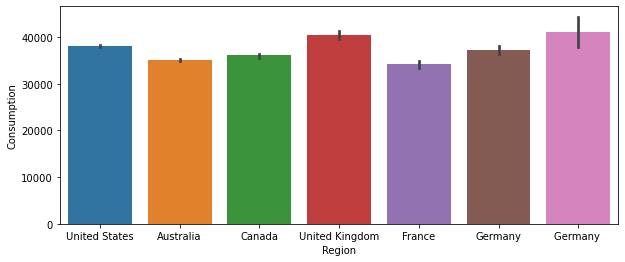

In [51]:
plt.figure(figsize=[10,4])
sns.barplot(x='Region', y='Consumption', data=customer_data)
plt.show()

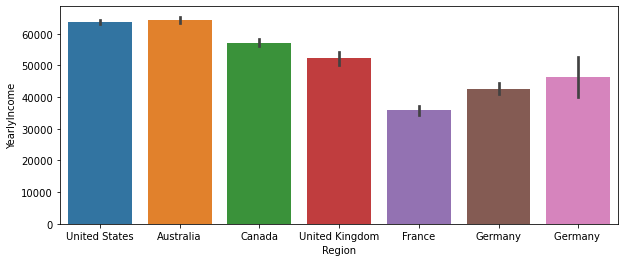

In [52]:
plt.figure(figsize=[10,4])
sns.barplot(x='Region', y='YearlyIncome', data=customer_data)
plt.show()

### Preprocessing

In [68]:
customer_data.dtypes

CustomerKey                int64
Age                        int64
MaritalStatus             object
Gender                    object
YearlyIncome             float64
TotalChildren              int64
NumberChildrenAtHome       int64
Education                 object
HouseOwnerFlag            object
NumberCarsOwned            int64
Consumption              float64
AgeGroup                category
Region                    object
dtype: object

#### 1. Visualize the correlations between Faetures

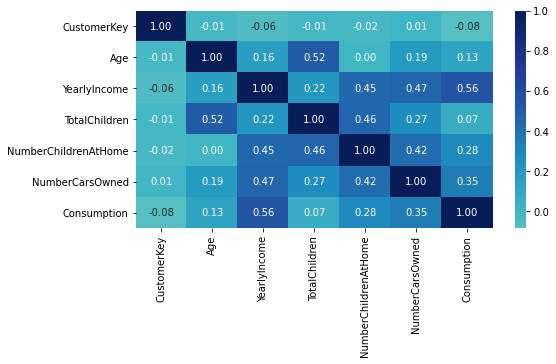

In [73]:
plt.figure(figsize=(8,4))
sns.heatmap(customer_data.corr(), annot=True, center=0, fmt='.2f', cmap = 'YlGnBu')
plt.show()

 #### 2. Encoding the data for modeling

In [221]:
mod_data.HouseOwnerFlag = mod_data.HouseOwnerFlag.astype(int)

In [193]:
mod_data = customer_data.copy(deep=True)
cat_cols = mod_data.select_dtypes(include=['object']).columns.tolist()

In [194]:
mod_data = mod_data.dropna()

#### A. OneHotEncoding

In [195]:
from sklearn.preprocessing import OneHotEncoder

In [197]:
enc = OneHotEncoder(drop='first')
enc_dumm = enc.fit_transform(mod_data[['Gender', 'MaritalStatus', 'AgeGroup', 'Region']])

In [198]:
enc_data = pd.DataFrame(data = enc_dumm.toarray(), columns = enc.get_feature_names())

In [199]:
mod_data = mod_data.drop(['Gender', 'MaritalStatus', 'AgeGroup', 'Region'], axis = 1)

In [200]:
mod_data = mod_data.merge(enc_data, left_index=True, right_index=True)

In [201]:
mod_data.head()

,CustomerKey,Age,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,HouseOwnerFlag,NumberCarsOwned,Consumption,x0_M,x1_S,x2_60=>80,x2_80=>112,x3_Canada,x3_France,x3_Germany,x3_Germany,x3_United Kingdom,x3_United States
0,4782,65,80000.0,2,1,Bachelors,1,1,33846.3980,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4789,56,100000.0,0,0,Bachelors,0,1,30446.6115,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4791,62,60000.0,1,0,Partial College,1,1,35813.1730,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4798,57,80000.0,5,5,Bachelors,1,4,30602.8955,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4800,63,90000.0,1,0,Bachelors,1,1,31479.5825,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### B. LabelEncoder

In [202]:
from sklearn.preprocessing import LabelEncoder

In [203]:
l_enc = LabelEncoder()

In [207]:
mod_data['Education'] = l_enc.fit_transform(mod_data['Education'])

In [223]:
mod_data.dtypes

CustomerKey               int64
Age                       int64
YearlyIncome            float64
TotalChildren             int64
NumberChildrenAtHome      int64
Education                 int32
HouseOwnerFlag            int32
NumberCarsOwned           int64
Consumption             float64
x0_M                    float64
x1_S                    float64
x2_60=>80               float64
x2_80=>112              float64
x3_Canada               float64
x3_France               float64
x3_Germany              float64
x3_Germany              float64
x3_United Kingdom       float64
x3_United States        float64
dtype: object

#### C. Check Correlations

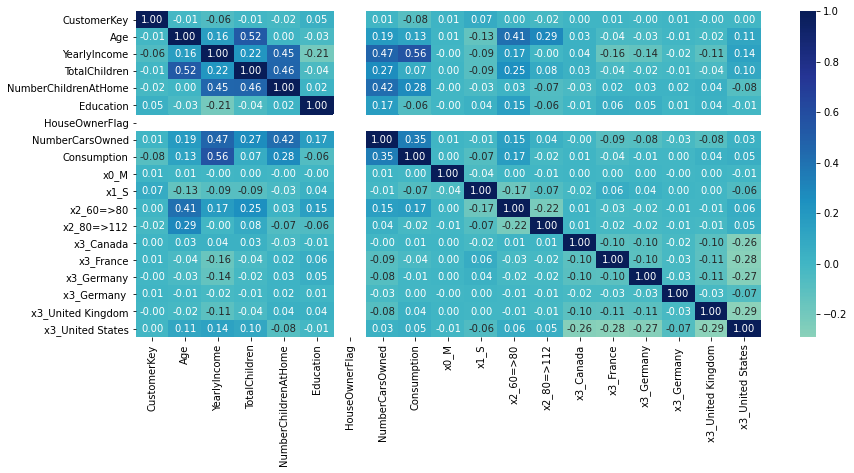

In [222]:
plt.figure(figsize=(14,6))
sns.heatmap(mod_data.corr(), annot=True, center=0, fmt='.2f', cmap = 'YlGnBu')
plt.show()

#### D. Split data

In [443]:
X = mod_data.drop(['Consumption', 'CustomerKey', 'x3_Germany'], axis=1)
y = mod_data['Consumption']

In [444]:
from sklearn.model_selection import train_test_split

In [445]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [446]:
X_train.shape, X_test.shape

((14784, 16), (3697, 16))

In [447]:
y_train.shape , y_test.shape

((14784,), (3697,))

## Modeling 

### 1. Regression

In [448]:
from sklearn.linear_model import LinearRegression

In [449]:
## initialize
reg_m = LinearRegression()

In [450]:
# train
reg_m.fit(X_train, y_train)

LinearRegression()

In [451]:
# Check the intercept
print(f"{reg_m.intercept_}")

17358.64358063519


In [452]:
reg_m.coef_

array([ 1.04371181e+02,  1.97625801e-01, -1.30706132e+03,  6.46958596e+02,
        3.52305348e+01,  1.81898940e-12,  1.27157850e+03,  4.84891001e+00,
       -3.95141975e+02,  1.59821733e+03, -1.38566094e+03,  1.59997139e+03,
        3.34815430e+03,  3.31731224e+03,  4.98639815e+03,  1.34855704e+03])

In [453]:
# Check the Coefficient
for name, coef in zip(X, reg_m.coef_):
    print(f"{name} => {round(coef,3)}")

Age => 104.371
YearlyIncome => 0.198
TotalChildren => -1307.061
NumberChildrenAtHome => 646.959
Education => 35.231
HouseOwnerFlag => 0.0
NumberCarsOwned => 1271.579
x0_M => 4.849
x1_S => -395.142
x2_60=>80 => 1598.217
x2_80=>112 => -1385.661
x3_Canada => 1599.971
x3_France => 3348.154
x3_Germany  => 3317.312
x3_United Kingdom => 4986.398
x3_United States => 1348.557


In [472]:
# Make Prediction
y_pred = reg_m.predict(X_test)

In [459]:
from sklearn.metrics import r2_score, mean_squared_error

In [463]:
print("Train Accuracy:",reg_m.score(X_train, y_train))
print("Test Accuracy:",reg_m.score(X_test, y_test))

Train Accuracy: 0.3543821791259304
Test Accuracy: 0.3716639727890395


In [473]:
r2 = r2_score(y_test, y_pred)
print(f"{r2:.4f}")

0.3717


In [462]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rmse:.2f}")

10034.78


In [467]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [470]:
kfold = KFold(n_splits=5)
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [471]:
results = cross_val_score(reg_m, X_train, y_train, cv=kfold)
results

array([0.35260103, 0.36468461, 0.34992044, 0.33643332, 0.35613423])

In [475]:
# adjusted r2
print(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

0.3689320770185571


## Clustering

In [477]:
from sklearn.cluster import KMeans

In [486]:
X_c = X.copy(deep=True)

#### Determine n of clusters

In [533]:
wcss = []
for n_c in range(1,11,2):
    kmeans = KMeans(n_clusters=n_c, random_state=0)
    kmeans.fit(X_c)
    wcss.append(kmeans.inertia_)
    

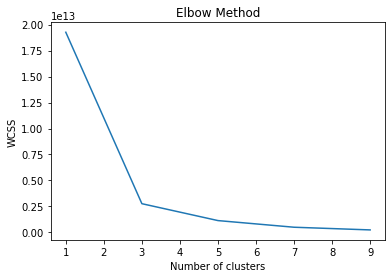

In [534]:
plt.plot(range(1,11,2), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [561]:
## Train the model with n of clusters = 9 
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_c)

KMeans(n_clusters=3, random_state=0)

In [562]:
kmeans.inertia_

2766325421106.809

#### Data processing to improve the model

In [543]:
X_c.head()

,Age,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,HouseOwnerFlag,NumberCarsOwned,x0_M,x1_S,x2_60=>80,x2_80=>112,x3_Canada,x3_France,x3_Germany,x3_United Kingdom,x3_United States
0,65,80000.0,2,1,0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,100000.0,0,0,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,60000.0,1,0,3,1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57,80000.0,5,5,0,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,63,90000.0,1,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [544]:
from sklearn.preprocessing import StandardScaler

In [547]:
stand = StandardScaler()
stand_data = stand.fit_transform(X_c)

In [558]:
wcss2 = []
for n_c in range(1,19,2):
    kmeans = KMeans(n_clusters=n_c, random_state=0)
    kmeans.fit(stand_data)
    wcss2.append(kmeans.inertia_)

In [559]:
wcss2

[277214.9999999992,
 223911.1281736917,
 190125.2101839009,
 157659.7931939086,
 135971.4983990919,
 127315.19049571537,
 120134.7825105452,
 115533.54688173404,
 108461.68339040269]

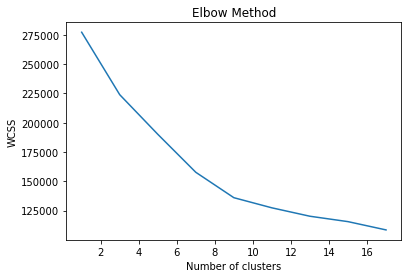

In [560]:
plt.plot(range(1,19,2), wcss2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

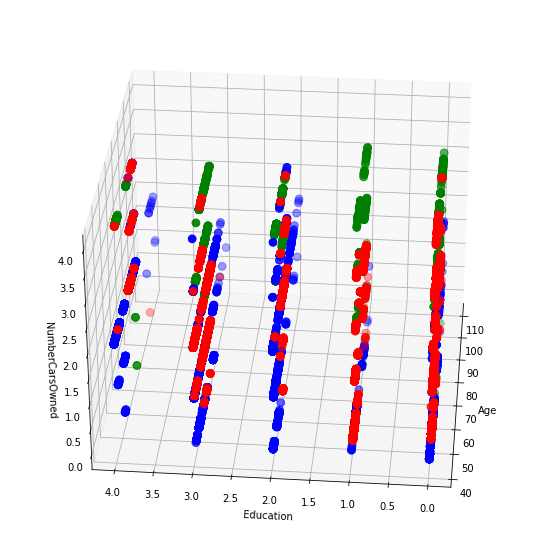

In [565]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(X_c.iloc[:,1:])
X_c["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_c.Age[X_c.label == 0], X_c["Education"][X_c.label == 0], X_c["NumberCarsOwned"][X_c.label == 0], c='blue', s=60)
ax.scatter(X_c.Age[X_c.label == 1], X_c["Education"][X_c.label == 1], X_c["NumberCarsOwned"][X_c.label == 1], c='red', s=60)
ax.scatter(X_c.Age[X_c.label == 2], X_c["Education"][X_c.label == 2], X_c["NumberCarsOwned"][X_c.label == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Education")
ax.set_zlabel('NumberCarsOwned')
plt.show()